<a href="https://colab.research.google.com/github/primriq/ML-Apex-Univ/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random Forest Classification with the Digits Dataset
This notebook presents a clear, structured walkthrough of how to apply the Random Forest algorithm to the handwritten digits dataset available in scikit-learn. The goal is to build a model, evaluate it, and study its performance using standard metrics.

### Loading Required Libraries and the Digits Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sn

digits = load_digits()

### Understanding the Dataset
The digits dataset contains images of handwritten digits represented as 8×8 pixel grids. Each sample is flattened into a vector of 64 features.

In [2]:
print('Data shape:', digits.data.shape)
print('Target shape:', digits.target.shape)

Data shape: (1797, 64)
Target shape: (1797,)


### Visualizing Sample Digit Images

<Figure size 640x480 with 0 Axes>

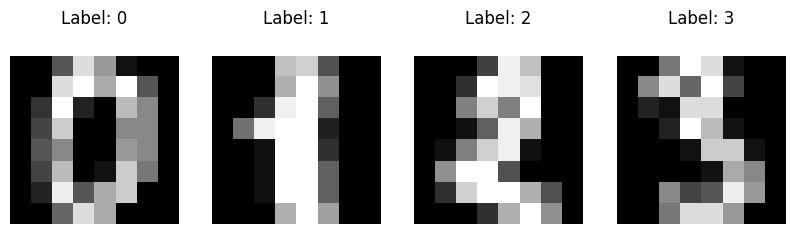

In [3]:
plt.gray()
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.matshow(digits.images[i])
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')

### Creating a DataFrame
This helps us inspect the data more easily.

In [4]:
df = pd.DataFrame(digits.data)
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Splitting the Dataset into Training and Test Sets

In [5]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape

((1437, 64), (360, 64))

### Training the Random Forest Classifier

In [6]:
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

### Model Accuracy

In [7]:
test_accuracy = model.score(X_test, y_test)
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.9638888888888889


### Generating Predictions

In [8]:
y_predicted = model.predict(X_test)

### Confusion Matrix

In [9]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  1,  0,  0,  3],
       [ 1,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  1,  0,  0,  1,  1,  0,  0,  0, 37]])

Text(0.5, 1.0, 'Confusion Matrix')

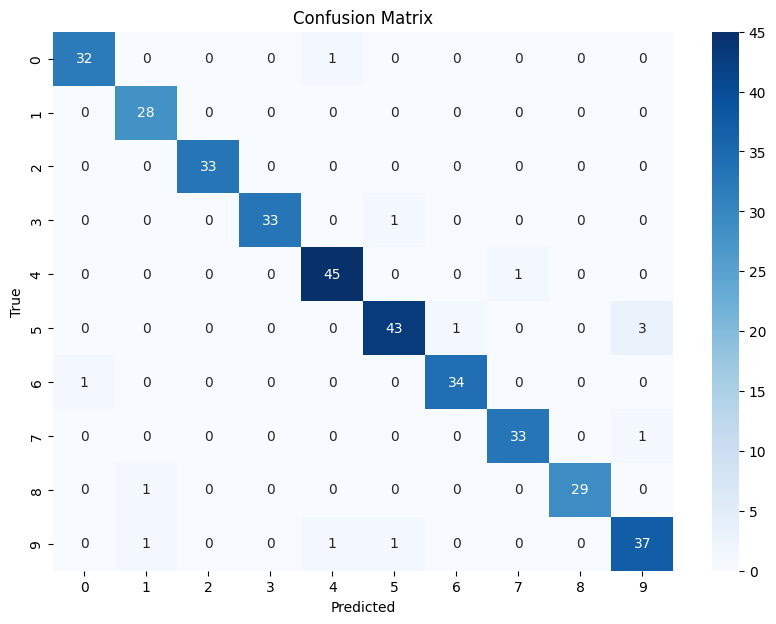

In [10]:
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

### Evaluation Metrics
To understand the model beyond accuracy, we compute precision, recall, and F1-score.

In [11]:
print('Accuracy:', accuracy_score(y_test, y_predicted))
print('Precision (macro):', precision_score(y_test, y_predicted, average='macro'))
print('Recall (macro):', recall_score(y_test, y_predicted, average='macro'))
print('F1 Score (macro):', f1_score(y_test, y_predicted, average='macro'))

print('\nClassification Report:\n')
print(classification_report(y_test, y_predicted))

Accuracy: 0.9638888888888889
Precision (macro): 0.966048849820943
Recall (macro): 0.9667123164966938
F1 Score (macro): 0.9661461283215372

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.96      0.98      0.97        46
           5       0.96      0.91      0.93        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.90      0.93      0.91        40

    accuracy                           0.96       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.96      0.96      0.96       360



### Summary
The Random Forest classifier performs well on the handwritten digits dataset. We loaded the dataset, trained a model, evaluated it using several metrics, and visualized the confusion matrix. This process demonstrates how ensemble algorithms can be applied effectively for classification tasks.